**Practicum 1: EDA and Storytelling with Data**

Group Members：Yanzhen Chen, Aidan Di Salvo, Alissa Rogozin, Brandon Tang

In [74]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/drive/MyDrive/practicum1_data/2019_ONTIME_REPORTING_FSW.csv")

In [76]:
data.head()


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.

This data science project involves analyzing airline on-time performance data for flights that either originated or departed from Arizona, Nevada, and California in 2019. The dataset comprises information such as flight dates, carrier codes, departure and arrival times, delays, and distances. The goal is to assess flight delays and uncover patterns or trends in airline performance. Additionally, we aim to determine if specific factors, such as the state or airport, are associated with longer delays. The analysis aims to offer insights that can enhance flight efficiency and punctuality.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 2 — Prepare the Data (10 pts)


1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/practicum1_data/2019_ONTIME_REPORTING_FSW.csv")

# Convert columns to appropriate data types
# Convert 'FL_DATE' to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Keep FL_NUM as string (object)
# Convert 'DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME', 'DISTANCE' to integers
int_columns = ['DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME', 'DISTANCE']
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Convert 'DEP_DELAY', 'ARR_DELAY' to floats
delay_columns = ['DEP_DELAY', 'ARR_DELAY']
for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

# Display the updated data types
updated_dtypes = df.dtypes
updated_dtypes

,0
FL_DATE,datetime64[ns]
CARRIER_CODE,object
TAIL_NUM,object
FL_NUM,int64
ORIGIN,object
ORIGIN_ST,object
DEST,object
DEST_ST,object
DEP_TIME,float64
DEP_DELAY,float32


2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.

In [ ]:
# Convert numeric columns
numeric_columns = ['DEP_TIME', 'ARR_TIME', 'ELAPSED_TIME', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Check for missing values
missing_values = df.isnull().sum()

# Check for invalid values in specific columns
invalid_dep_time = ((df['DEP_TIME'] < 0) | (df['DEP_TIME'] > 2400)).sum()
invalid_arr_time = ((df['ARR_TIME'] < 0) | (df['ARR_TIME'] > 2400)).sum()
invalid_elapsed_time = (df['ELAPSED_TIME'] < 0).sum()
invalid_distance = (df['DISTANCE'] < 0).sum()

# Display results
print("Missing values:")
print(missing_values)
print("\
Invalid values:")
print(f"DEP_TIME (< 0 or > 2400): {invalid_dep_time}")
print(f"ARR_TIME (< 0 or > 2400): {invalid_arr_time}")
print(f"ELAPSED_TIME (< 0): {invalid_elapsed_time}")
print(f"DISTANCE (< 0): {invalid_distance}")

# Display basic statistics for numeric columns
print(df[numeric_columns].describe())

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

# Display unique values for categorical columns
categorical_columns = ['CARRIER_CODE', 'ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST']
for col in categorical_columns:
    print(f"\
Unique values in {col}:")
    print(df[col].value_counts().head())

Missing values:
FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64
Invalid values:
DEP_TIME (< 0 or > 2400): 0
ARR_TIME (< 0 or > 2400): 0
ELAPSED_TIME (< 0): 0
DISTANCE (< 0): 0
           DEP_TIME      ARR_TIME  ELAPSED_TIME      DISTANCE     DEP_DELAY  \
count  1.870796e+06  1.869259e+06  1.865619e+06  1.897503e+06  1.870788e+06   
mean   1.341393e+03  1.470180e+03  1.748096e+02  1.144598e+03  1.316313e+01   
std    5.190586e+02  5.594787e+02  9.273539e+01  7.560259e+02  4.379007e+01   
min    1.000000e+00  1.000000e+00  2.600000e+01  6.600000e+01  0.000000e+00   
25%    9.130000e+02  1.050000e+03  9.400000e+01  4.470000e+02  0.000000e+00   
50%    1.326000e+03  1.518000e+03  1.530000e+02  9.540000e+02  0.000000e+00  

There are multiple values which are missing in the dataset.
* TAIL_NUM: 4,791 missing values
* DEP_TIME: 26,707 missing values
* DEP_DELAY: 26,715 missing values
* ARR_TIME: 28,244 missing values
* ARR_DELAY: 31,884 missing values
* ELAPSED_TIME: 31,884 missing values

For the categorical values, they can be replaced with a placeholder. As for the numeric variables, they can be imputated in order to fill in the missing values. In this case, we'll use the mean of the values. The median will be best as it helps maintain the distribution of the data overall and is a suitable estimate for the missing values due to the median not being affected by outliers, making it a more reliable measure for skewed distributions.

In [ ]:
# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Handle missing values
df = df.fillna({
    'TAIL_NUM': 'UNKNOWN',
    'DEP_TIME': df['DEP_TIME'].median(),
    'ARR_TIME': df['ARR_TIME'].median(),
    'ELAPSED_TIME': df['ELAPSED_TIME'].median(),
    'DISTANCE': df['DISTANCE'].median(),
    'DEP_DELAY': df['DEP_DELAY'].median(),
    'ARR_DELAY': df['ARR_DELAY'].median()
})

# Handle invalid values
df['DEP_TIME'] = df['DEP_TIME'].clip(0, 2400)
df['ARR_TIME'] = df['ARR_TIME'].clip(0, 2400)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].clip(lower=0)
df['DISTANCE'] = df['DISTANCE'].clip(lower=0)

# Feature engineering
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek
df['IS_DELAYED'] = (df['DEP_DELAY'] > 15).astype(int)

# Outlier handling using IQR method
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

for col in ['DEP_DELAY', 'ARR_DELAY']:
    df[col] = handle_outliers(df[col])

# Display summary of the preprocessed data
print(df.describe())

# Display correlation heatmap after preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns + ['DAY_OF_WEEK', 'IS_DELAYED']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Preprocessing')
plt.tight_layout()
plt.savefig('correlation_heatmap_after_preprocessing.png')
plt.close()


                             FL_DATE        FL_NUM      DEP_TIME  \
count                        1897503  1.897503e+06  1.897503e+06   
mean   2019-07-03 07:04:02.585545984  2.049927e+03  1.341176e+03   
min              2019-01-01 00:00:00  1.000000e+00  1.000000e+00   
25%              2019-04-05 00:00:00  7.060000e+02  9.170000e+02   
50%              2019-07-04 00:00:00  1.636000e+03  1.326000e+03   
75%              2019-10-01 00:00:00  2.718000e+03  1.754000e+03   
max              2019-12-31 00:00:00  7.910000e+03  2.400000e+03   
std                              NaN  1.679758e+03  5.153960e+02   

          DEP_DELAY      ARR_TIME     ARR_DELAY  ELAPSED_TIME      DISTANCE  \
count  1.897503e+06  1.897503e+06  1.897503e+06  1.897503e+06  1.897503e+06   
mean   4.330264e+00  1.470892e+03  4.195548e+00  1.744431e+02  1.144598e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  2.600000e+01  6.600000e+01   
25%    0.000000e+00  1.055000e+03  0.000000e+00  9.500000e+01  4.470000

3. At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

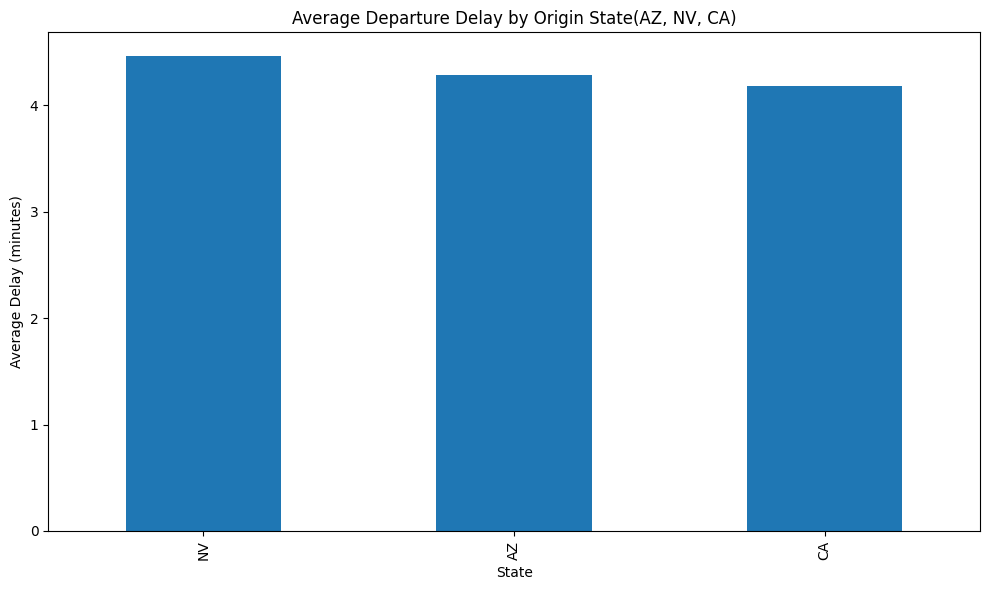

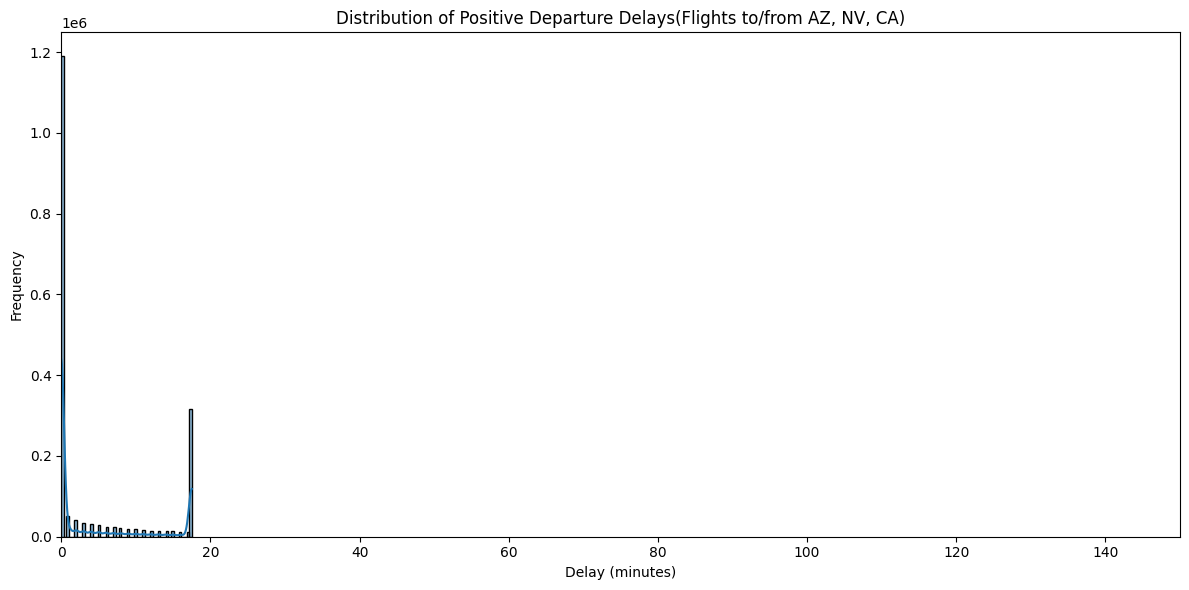

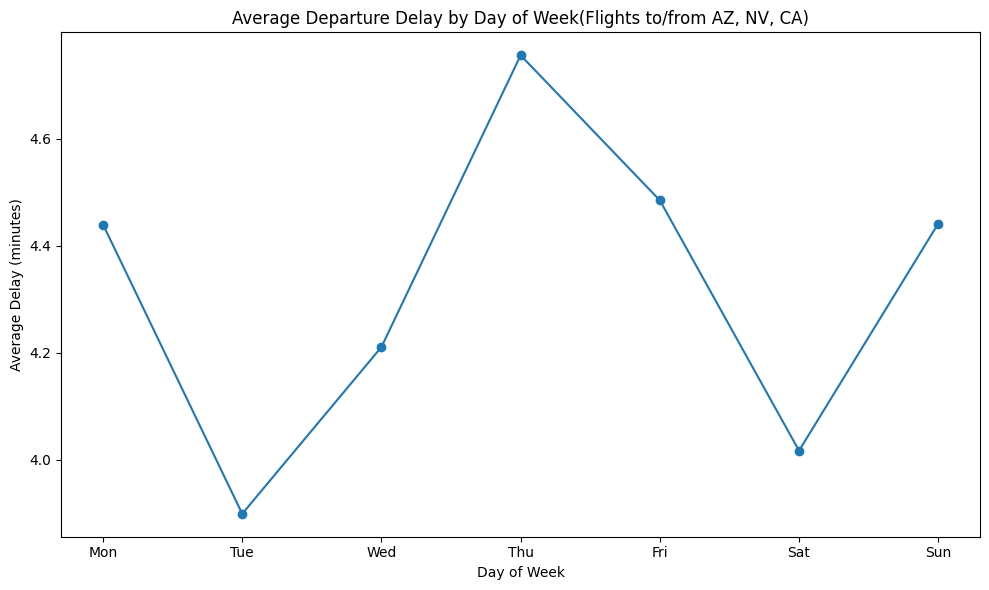

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for flights originating or departing from Arizona, Nevada, and California
states_of_interest = ['AZ', 'NV', 'CA']
df_filtered = df[(df['ORIGIN_ST'].isin(states_of_interest)) | (df['DEST_ST'].isin(states_of_interest))]

# 1. Average Delay by State
state_delays = df_filtered[df_filtered['ORIGIN_ST'].isin(states_of_interest)].groupby('ORIGIN_ST')['DEP_DELAY'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
state_delays.plot(kind='bar')
plt.title('Average Departure Delay by Origin State\
(AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

# Filter out negative departure delays
positive_delays = df_filtered[df_filtered['DEP_DELAY'] >= 0]

# Create a histogram for the distribution of positive departure delays
plt.figure(figsize=(12, 6))
sns.histplot(data=positive_delays, x='DEP_DELAY', bins=50, kde=True)
plt.title('Distribution of Positive Departure Delays\
(Flights to/from AZ, NV, CA)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 150)  # Focusing on delays between 0 and 150 minutes
plt.tight_layout()
plt.show()

# 3. Delay by Day of Week
df_filtered['DAY_OF_WEEK'] = df_filtered['FL_DATE'].dt.dayofweek
day_of_week_delays = df_filtered.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean()
plt.figure(figsize=(10, 6))
day_of_week_delays.plot(kind='line', marker='o')
plt.title('Average Departure Delay by Day of Week\
(Flights to/from AZ, NV, CA)')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()




1.   **Average Departure Delay by Origin State** :
This bar chart shows the average departure delay for flights originating from Arizona, Nevada, and California. It helps identify which state experiences the most delays on average.
2.   **Distribution of Departure Delays**:
This histogram shows the distribution of departure delays, focusing on delays between 0 and 150 minutes. It gives insight into the frequency and extent of delays.
3. **Average Departure Delay by Day of Week**:
This line chart shows the average departure delay for each day of the week, helping to identify any patterns related to specific days.



Question 3 — (20 points)


1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.

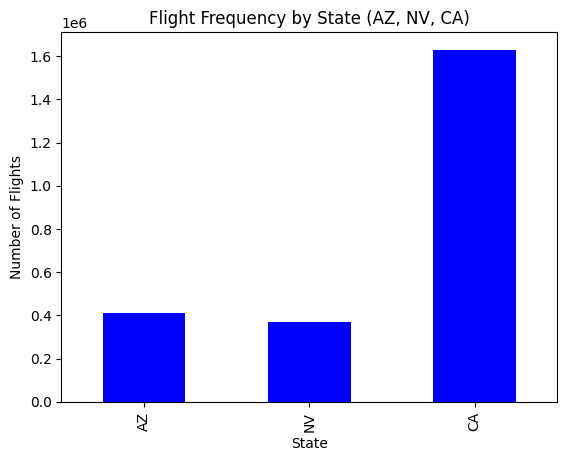

In [ ]:
region_states = ['AZ', 'NV', 'CA']
regional_data = data[(data['ORIGIN_ST'].isin(region_states)) | (data['DEST_ST'].isin(region_states))]

def calculate_flight_frequency(data):

    origin_flights = data['ORIGIN_ST'].value_counts()
    destination_flights = data['DEST_ST'].value_counts()

    total_flights = origin_flights.add(destination_flights, fill_value=0)
    total_flights = total_flights[region_states]

    return total_flights

flight_frequency = calculate_flight_frequency(regional_data)

flight_frequency.plot(kind='bar', color='blue')
plt.title('Flight Frequency by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.show()

In this question, we use flight frequency as the primary measure because we want to determine which states have the most flights, reflecting how busy air traffic is. Flight frequency can help us determine which states have more aviation activity, thus identifying the states with the busiest air traffic.

2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.

Top 5 destinations for flights originating from AZ:
DEST
DEN    10432
LAX     9713
DFW     7888
SEA     6888
LAS     6835
Name: count, dtype: int64


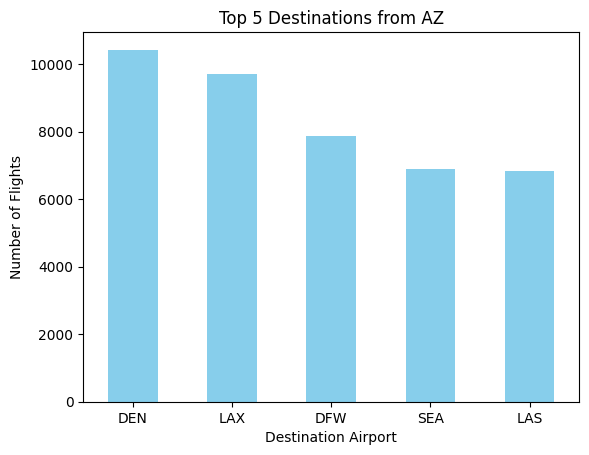

Top 5 destinations for flights originating from NV:
DEST
LAX    13971
SFO     9425
DEN     8786
PHX     7903
SEA     7225
Name: count, dtype: int64


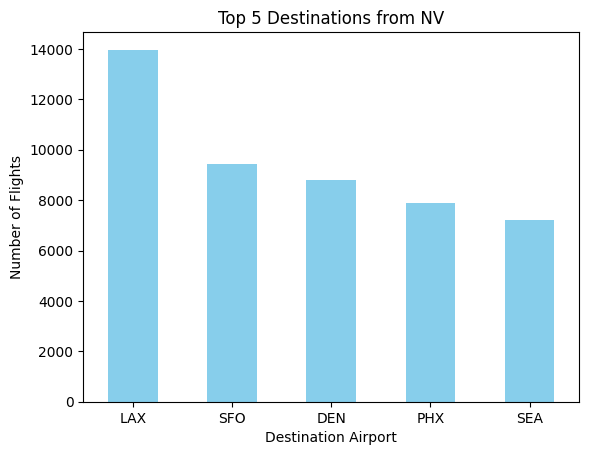

Top 5 destinations for flights originating from CA:
DEST
PHX    49926
LAS    48972
SFO    45855
SEA    43744
LAX    41320
Name: count, dtype: int64


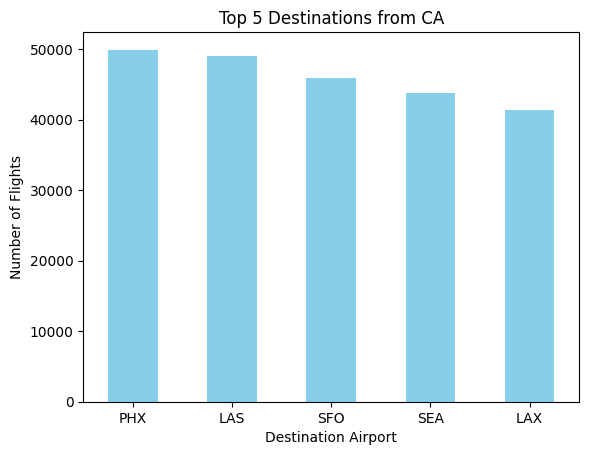

In [ ]:
def analyze_top_destinations(data, state, top_n=5):
    state_flights = data[data['ORIGIN_ST'] == state]
    top_destinations = state_flights['DEST'].value_counts().head(top_n)

    print(f"Top {top_n} destinations for flights originating from {state}:")
    print(top_destinations)

    top_destinations.plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} Destinations from {state}")
    plt.xlabel('Destination Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=0)
    plt.show()

for state in ['AZ', 'NV', 'CA']:
    analyze_top_destinations(data, state)

3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

Top 10 airlines in AZ by proportion of flights:
CARRIER_CODE
WN    0.32
AA    0.30
OO    0.12
YV    0.11
DL    0.05
UA    0.04
G4    0.03
AS    0.02
F9    0.01
B6    0.01
Name: count, dtype: float64


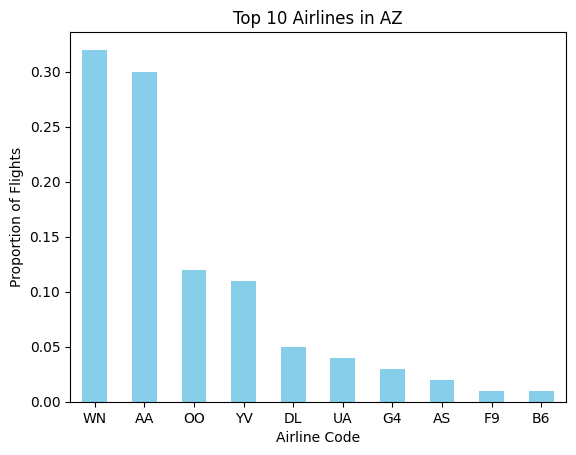

Top 10 airlines in NV by proportion of flights:
CARRIER_CODE
WN    0.43
NK    0.10
AA    0.09
UA    0.08
DL    0.08
F9    0.05
G4    0.05
AS    0.04
OO    0.04
B6    0.03
Name: count, dtype: float64


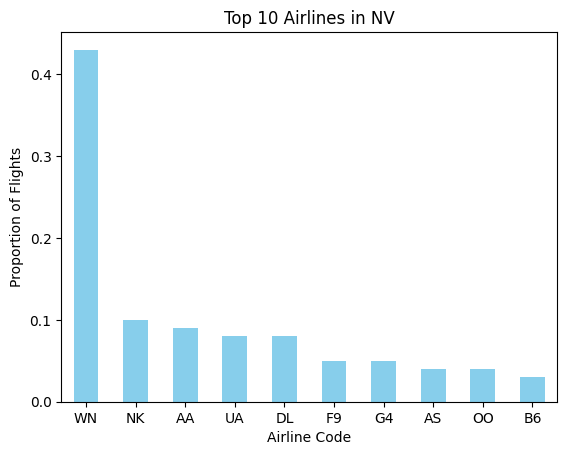

Top 10 airlines in CA by proportion of flights:
CARRIER_CODE
WN    0.32
OO    0.18
UA    0.14
AA    0.11
AS    0.09
DL    0.09
B6    0.03
NK    0.02
YV    0.01
F9    0.01
Name: count, dtype: float64


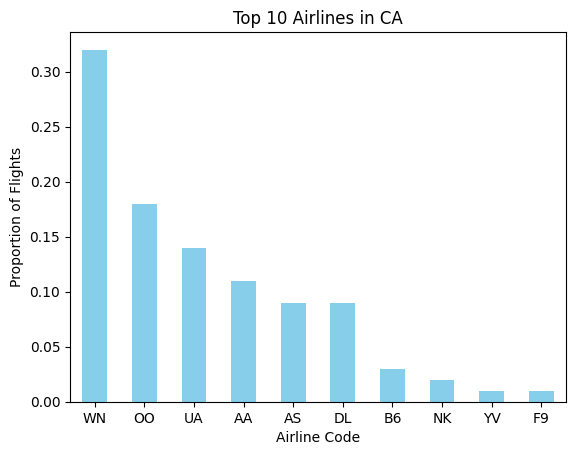

In [ ]:
def airline_proportion(data, state, top_n=10):

    state_flights = data[data['ORIGIN_ST'] == state]
    airline_flights = state_flights['CARRIER_CODE'].value_counts()
    airline_proportion = round(airline_flights / airline_flights.sum(),2)

    top_airlines = airline_proportion.head(top_n)
    print(f"Top 10 airlines in {state} by proportion of flights:")
    print(top_airlines)

    top_airlines.plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} Airlines in {state}")
    plt.xlabel('Airline Code')
    plt.ylabel('Proportion of Flights')
    plt.xticks(rotation=0)
    plt.show()

for state in ['AZ', 'NV', 'CA']:
    airline_proportion(data, state)

Through my findings, WN has the highest percentage of flights in all states, AZ, NV and CA.Southwest Airlines is one of the largest domestic carriers in the U.S., with a strong market presence especially in the southwestern part of the U.S. (which includes AZ, NV, and CA).

Question 4 — (20 points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.

There is one noticeable pattern where carriers with higher average departure and arrival delays tend to have a lower total distance flown. Another pattern we identified is that carriers with a higher flight count tend to have more consistent and lower average delays. These patterns highlight the relationships between operational performance (delays) and operational scale (flight count and distance)

In [ ]:
# Group by CARRIER_CODE to find patterns
carrier_summary = df.groupby('CARRIER_CODE').agg(
    average_dep_delay=('DEP_DELAY', 'mean'),
    average_arr_delay=('ARR_DELAY', 'mean'),
    total_distance=('DISTANCE', 'sum'),
    flight_count=('FL_NUM', 'count')
).reset_index()

# Sort the summary for better visualization
carrier_summary = carrier_summary.sort_values(by='total_distance', ascending=False)

# Display the summary
print(carrier_summary)

   CARRIER_CODE  average_dep_delay  average_arr_delay  total_distance  \
12           WN           5.044274           4.018888       454993569   
0            AA           4.465353           4.601127       431209245   
11           UA           4.176538           4.479026       362571711   
3            DL           3.843839           3.718349       279233317   
1            AS           3.825743           4.524509       181842537   
10           OO           3.316602           3.661135       134630534   
2            B6           4.417387           4.361515       114647729   
9            NK           3.758488           3.859543        70821952   
5            F9           5.846863           5.660993        43036568   
7            HA           4.751758           5.984481        39981038   
6            G4           4.253571           4.614806        32395025   
13           YV           3.815962           4.156955        23697198   
8            MQ           4.180625           4.0720

2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

In [ ]:
# Group by CARRIER_CODE and aggregate min, max, and average for dep/arr delays
delay_summary = df.groupby('CARRIER_CODE').agg(
    min_dep_delay=('DEP_DELAY', 'min'),
    max_dep_delay=('DEP_DELAY', 'max'),
    avg_dep_delay=('DEP_DELAY', 'mean'),
    min_arr_delay=('ARR_DELAY', 'min'),
    max_arr_delay=('ARR_DELAY', 'max'),
    avg_arr_delay=('ARR_DELAY', 'mean')
).reset_index()

# Sorting by average arrival delay for top 10 carriers
top_10_carriers = delay_summary.sort_values(by='avg_arr_delay', ascending=False).head(10)
print(top_10_carriers)

   CARRIER_CODE  min_dep_delay  max_dep_delay  avg_dep_delay  min_arr_delay  \
7            HA            0.0           17.5       4.751758            0.0   
5            F9            0.0           17.5       5.846863            0.0   
6            G4            0.0           17.5       4.253571            0.0   
0            AA            0.0           17.5       4.465353            0.0   
1            AS            0.0           17.5       3.825743            0.0   
11           UA            0.0           17.5       4.176538            0.0   
4            EV            0.0           17.5       3.776596            0.0   
2            B6            0.0           17.5       4.417387            0.0   
13           YV            0.0           17.5       3.815962            0.0   
8            MQ            0.0           17.5       4.180625            0.0   

    max_arr_delay  avg_arr_delay  
7            17.5       5.984481  
5            17.5       5.660993  
6            17.5       4

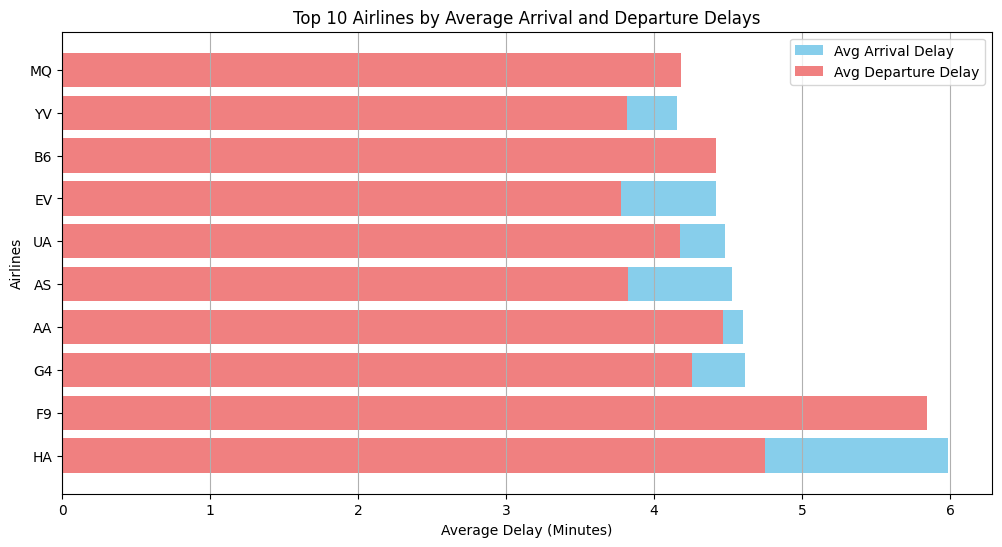

In [ ]:
import matplotlib.pyplot as plt

# Visualizing top 10 airlines with average delays
plt.figure(figsize=(12, 6))

# Plot for average arrival and departure delays
plt.barh(top_10_carriers['CARRIER_CODE'], top_10_carriers['avg_arr_delay'], color='skyblue', label='Avg Arrival Delay')
plt.barh(top_10_carriers['CARRIER_CODE'], top_10_carriers['avg_dep_delay'], color='lightcoral', label='Avg Departure Delay')

plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Airlines')
plt.title('Top 10 Airlines by Average Arrival and Departure Delays')
plt.legend()
plt.grid(axis='x')
plt.show()

1.) which carriers are more prone to flight delays?

The bar chart above comparing average delays for each airline will highlight carriers with the worst delay performance. Airlines like Frontier (F9) or Spirit (NK) often show higher average delays in studies due to operational inefficiencies or lower priority at crowded airports.

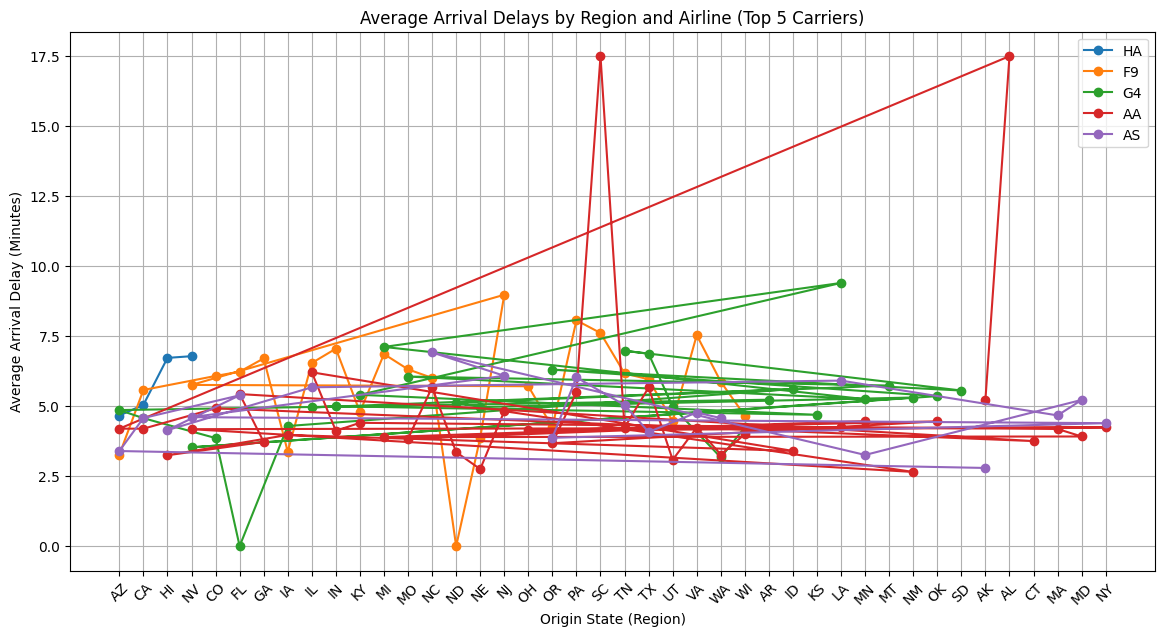

In [ ]:
# Grouping by Carrier and Origin State (Region)
regional_delays = df.groupby(['CARRIER_CODE', 'ORIGIN_ST']).agg(
    avg_dep_delay=('DEP_DELAY', 'mean'),
    avg_arr_delay=('ARR_DELAY', 'mean')
).reset_index()

# Filter for top 5 carriers (as an example)
top_5_carriers = top_10_carriers['CARRIER_CODE'].head(5).tolist()
regional_delays_filtered = regional_delays[regional_delays['CARRIER_CODE'].isin(top_5_carriers)]

# Plot for regional delay patterns
plt.figure(figsize=(14, 7))

for carrier in top_5_carriers:
    carrier_data = regional_delays_filtered[regional_delays_filtered['CARRIER_CODE'] == carrier]
    plt.plot(carrier_data['ORIGIN_ST'], carrier_data['avg_arr_delay'], marker='o', label=carrier)

plt.xticks(rotation=45)
plt.xlabel('Origin State (Region)')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.title('Average Arrival Delays by Region and Airline (Top 5 Carriers)')
plt.legend()
plt.grid(True)
plt.show()


2) are the delays occurring more frequently in certain regions?

The second visualization above breaks down delays by origin state (region).
For example, you might find that delays are more frequent in regions with higher air traffic or severe weather conditions, such as New York (NY) or Chicago (IL).

Explanation of patterns: By analyzing the data, you can conclude which airlines have consistent delays and whether specific regions contribute to these delays. This information helps identify operational bottlenecks and the impact of geography on punctuality.

Question 5 — (30 points)

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".

In [54]:
# Calculate the average arrival delay, departure delay, total number of flights, and total distance for each airline
carrier_performance = df.groupby('CARRIER_CODE').agg(
    avg_arrival_delay=('ARR_DELAY', 'mean'),
    avg_departure_delay=('DEP_DELAY', 'mean'),
    total_flights=('FL_NUM', 'count'),
    total_distance=('DISTANCE', 'sum')
).reset_index()

# averaging both arrival and departure delays
carrier_performance['performance_score'] = (
    carrier_performance['avg_arrival_delay'] + carrier_performance['avg_departure_delay']
) / 2

best_carriers = carrier_performance.sort_values(by='performance_score').head(10)

# Display the top 10 airlines with their average delays, total number of flights, and total distance
print(best_carriers[['CARRIER_CODE', 'avg_arrival_delay', 'avg_departure_delay', 'total_flights', 'total_distance']])


   CARRIER_CODE  avg_arrival_delay  avg_departure_delay  total_flights  \
10           OO           3.661135             3.316602         239463   
14           YX           3.448052             3.636364            154   
3            DL           3.718349             3.843839         187842   
9            NK           3.859543             3.758488          54490   
13           YV           4.156955             3.815962          42407   
4            EV           4.414894             3.776596             94   
8            MQ           4.072027             4.180625           1791   
1            AS           4.524509             3.825743         149495   
11           UA           4.479026             4.176538         235935   
2            B6           4.361515             4.417387          57219   

    total_distance  
10       134630534  
14          189450  
3        279233317  
9         70821952  
13        23697198  
4           127500  
8          2500782  
1        18184253

Average delay time is an important factor in judging airline performance; the lower the average delay time, the better the performance.

2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

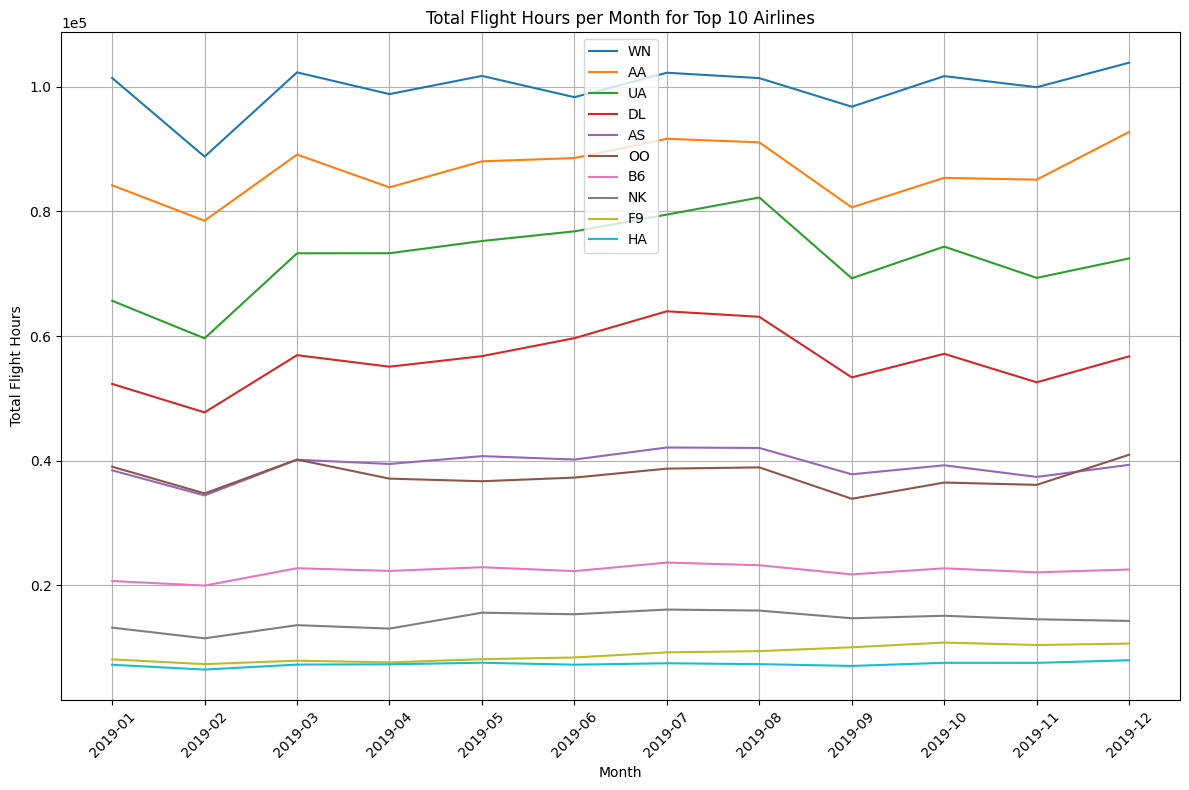

In [90]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')
def convert_to_minutes(time):
    if pd.isna(time):
        return None
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# convert DEP_TIME and ARR_TIME to total minutes
df['DEP_TOTAL_MINUTES'] = df['DEP_TIME'].apply(convert_to_minutes)
df['ARR_TOTAL_MINUTES'] = df['ARR_TIME'].apply(convert_to_minutes)

# calculate flight duration
df['FLIGHT_DURATION_MINUTES'] = df['ARR_TOTAL_MINUTES'] - df['DEP_TOTAL_MINUTES']

# If the flight time is past midnight, correct to positive
df['FLIGHT_DURATION_MINUTES'] = df['FLIGHT_DURATION_MINUTES'].apply(lambda x: x if x >= 0 else x + 1440)

# Convert minutes to hours
df['FLIGHT_DURATION_HOURS'] = df['FLIGHT_DURATION_MINUTES'] / 60

df['YearMonth'] = df['FL_DATE'].dt.to_period('M')

monthly_flight_hours = df.groupby(['CARRIER_CODE', 'YearMonth']).agg(
    total_flight_hours=('FLIGHT_DURATION_HOURS', 'sum')
).reset_index()

top_10_airlines_by_hours = monthly_flight_hours.groupby('CARRIER_CODE').agg(
    total_flight_hours=('total_flight_hours', 'sum')
).nlargest(10, 'total_flight_hours').reset_index()

top_10_airlines_data = monthly_flight_hours[monthly_flight_hours['CARRIER_CODE'].isin(top_10_airlines_by_hours['CARRIER_CODE'])]

plt.figure(figsize=(12, 8))
for airline in top_10_airlines_by_hours['CARRIER_CODE']:
    airline_data = top_10_airlines_data[top_10_airlines_data['CARRIER_CODE'] == airline]
    plt.plot(airline_data['YearMonth'].astype(str), airline_data['total_flight_hours'], label=airline)

plt.title('Total Flight Hours per Month for Top 10 Airlines')
plt.xlabel('Month')
plt.ylabel('Total Flight Hours')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:


1. Indicate which airline operates the selected aircraft and where it often travels.
Arrival and departure delays at the airports where it traveled.

In [ ]:
selected_tail_nums = ['N916NN', 'N847UA', 'N286SY']

# 1. aircraft and where it often travels
def analyze_aircraft_routes(data, tail_num):

    aircraft_data = data[data['TAIL_NUM'] == tail_num]

    airline = aircraft_data['CARRIER_CODE'].unique()[0]
    print(f"Aircraft {tail_num} is operated by airline {airline}.")

    top_destinations = aircraft_data['DEST'].value_counts().head(5).index
    print(f"Aircraft {tail_num} often travels to the following destinations:")
    for dest in top_destinations:
      print(f"  {dest}")



# 2. Arrival and departure delays
def analyze_aircraft_delays(data, tail_num):
    aircraft_data = data[data['TAIL_NUM'] == tail_num]

    avg_arr_delay = aircraft_data['ARR_DELAY'].mean(skipna=True)
    avg_dep_delay = aircraft_data['DEP_DELAY'].mean(skipna=True)

    print(f"Aircraft {tail_num} has an average arrival delay of {avg_arr_delay:.2f} minutes.")
    print(f"Aircraft {tail_num} has an average departure delay of {avg_dep_delay:.2f} minutes.")


for tail_num in selected_tail_nums:
    print(f"\nAnalyzing Aircraft {tail_num}:")
    analyze_aircraft_routes(data, tail_num)
    analyze_aircraft_delays(data, tail_num)



Analyzing Aircraft N916NN:
Aircraft N916NN is operated by airline AA.
Aircraft N916NN often travels to the following destinations:
  DFW
  PHX
  ORD
  TUS
  LAS
Aircraft N916NN has an average arrival delay of 15.30 minutes.
Aircraft N916NN has an average departure delay of 13.34 minutes.

Analyzing Aircraft N847UA:
Aircraft N847UA is operated by airline UA.
Aircraft N847UA often travels to the following destinations:
  SFO
  IAH
  DEN
  ORD
  LAS
Aircraft N847UA has an average arrival delay of 16.41 minutes.
Aircraft N847UA has an average departure delay of 15.35 minutes.

Analyzing Aircraft N286SY:
Aircraft N286SY is operated by airline OO.
Aircraft N286SY often travels to the following destinations:
  SLC
  TUS
  LAX
  BUR
  FAT
Aircraft N286SY has an average arrival delay of 4.84 minutes.
Aircraft N286SY has an average departure delay of 5.24 minutes.


2. Create summary statistics on the distance traveled.

In [ ]:
def summarize_distance(data, tail_num):
    aircraft_data = data[data['TAIL_NUM'] == tail_num]

    distance_stats = aircraft_data['DISTANCE'].describe()

    print(f"\nSummary statistics for aircraft {tail_num}:")
    print(round(distance_stats),2)

for tail_num in selected_tail_nums:
    summarize_distance(data, tail_num)



Summary statistics for aircraft N916NN:
count     258.0
mean     1368.0
std       460.0
min       236.0
25%      1137.0
50%      1345.0
75%      1705.0
max      2611.0
Name: DISTANCE, dtype: float64 2

Summary statistics for aircraft N847UA:
count     297.0
mean     1225.0
std       717.0
min       192.0
25%       550.0
50%      1222.0
75%      1781.0
max      2521.0
Name: DISTANCE, dtype: float64 2

Summary statistics for aircraft N286SY:
count    222.0
mean     540.0
std       68.0
min      422.0
25%      451.0
50%      558.0
75%      601.0
max      674.0
Name: DISTANCE, dtype: float64 2


**3**. Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.


Analyzing Aircraft N916NN:


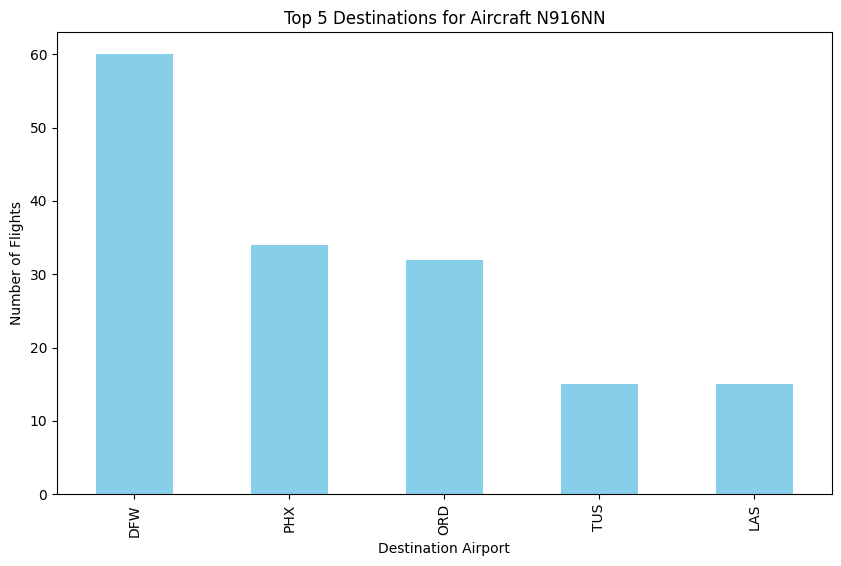

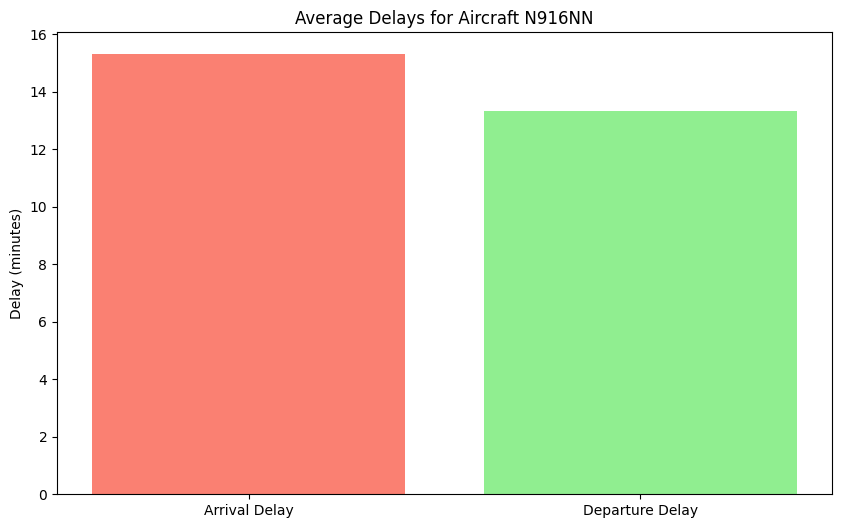

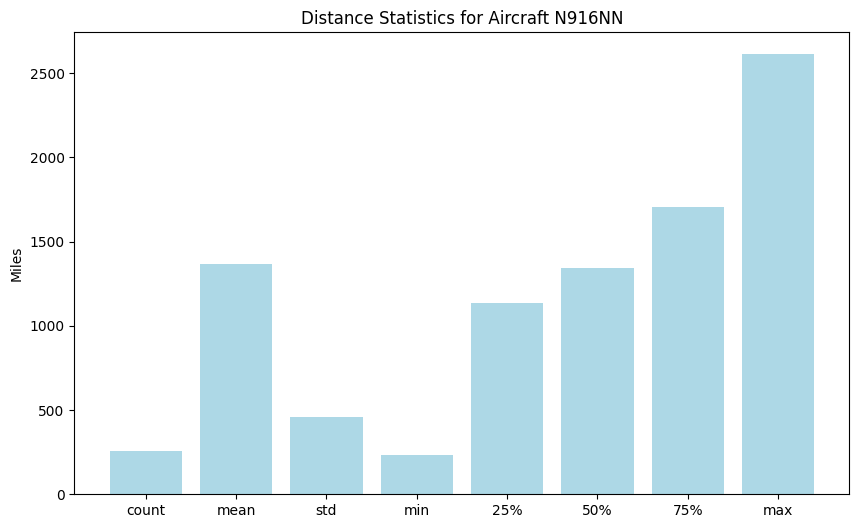


Analyzing Aircraft N847UA:


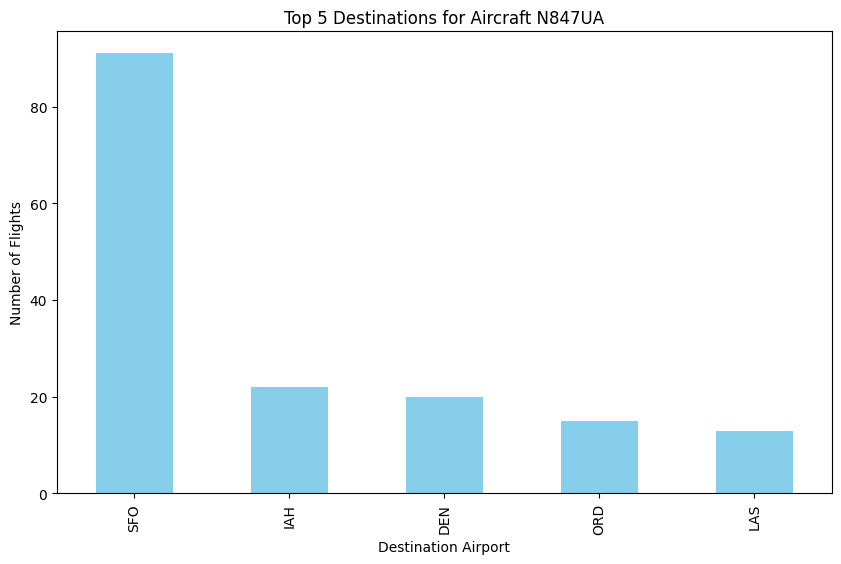

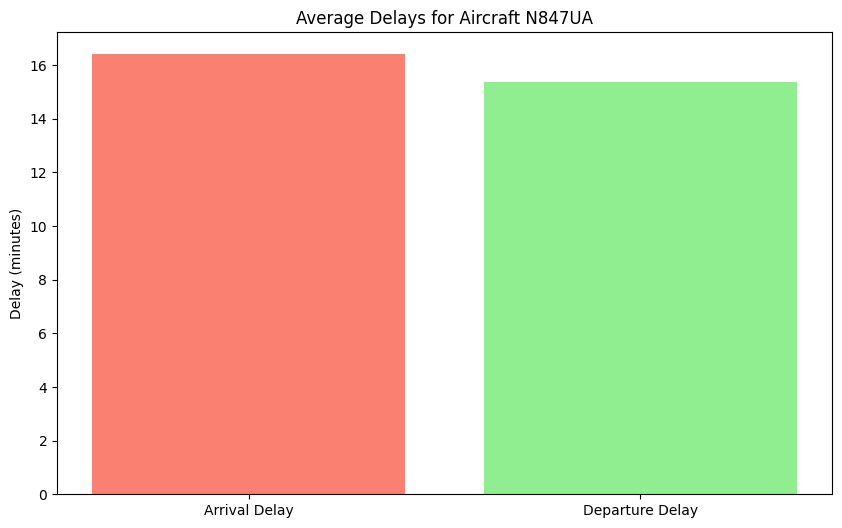

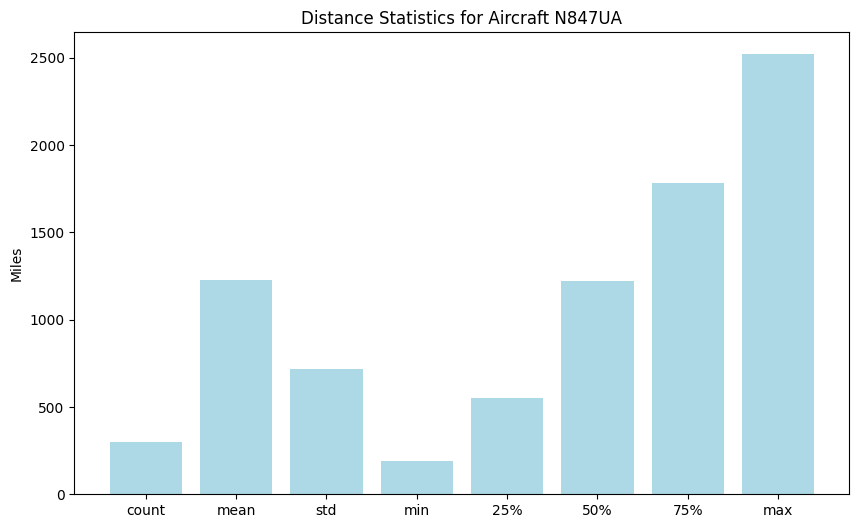


Analyzing Aircraft N286SY:


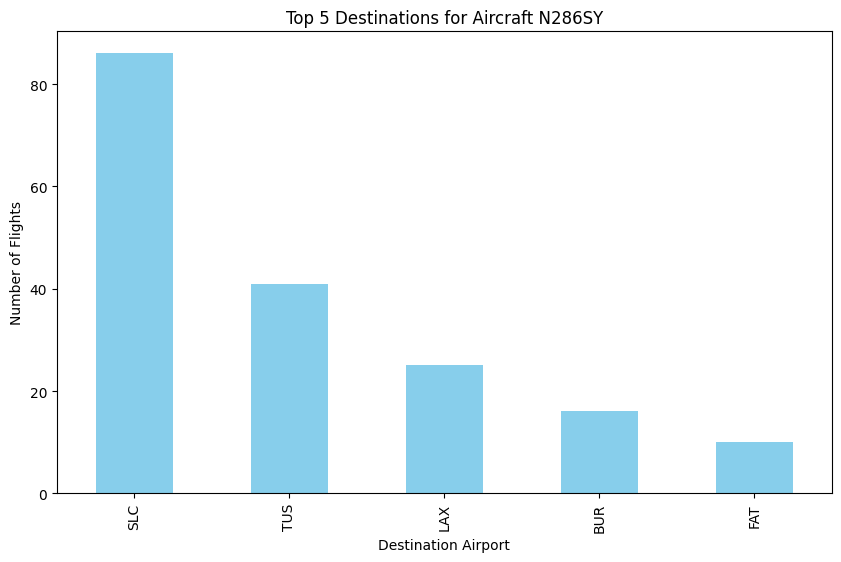

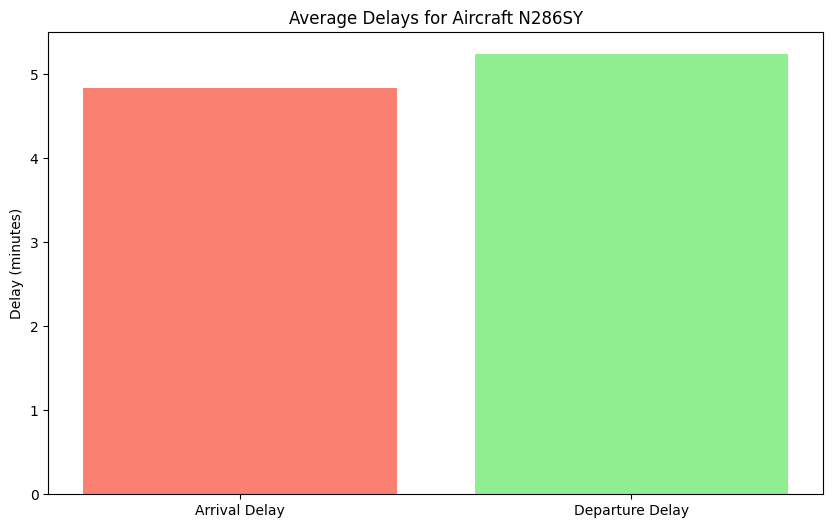

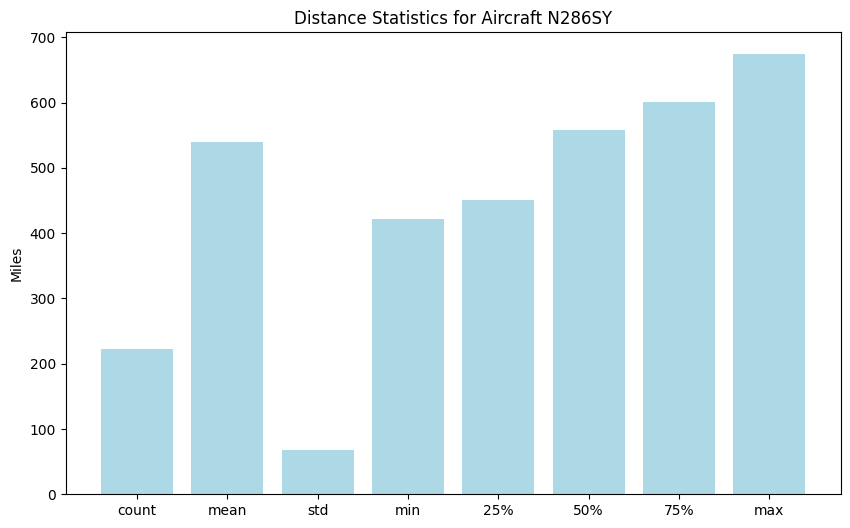

In [ ]:
def visualize_aircraft_routes(data, tail_num):
    aircraft_data = data[data['TAIL_NUM'] == tail_num]
    top_destinations = aircraft_data['DEST'].value_counts().head(5)

    plt.figure(figsize=(10, 6))
    top_destinations.plot(kind='bar', color='skyblue')
    plt.title(f"Top 5 Destinations for Aircraft {tail_num}")
    plt.ylabel('Number of Flights')
    plt.xlabel('Destination Airport')
    plt.show()

def visualize_aircraft_delays(data, tail_num):
    aircraft_data = data[data['TAIL_NUM'] == tail_num]

    avg_arr_delay = aircraft_data['ARR_DELAY'].mean()
    avg_dep_delay = aircraft_data['DEP_DELAY'].mean()

    plt.figure(figsize=(10, 6))
    plt.bar(['Arrival Delay', 'Departure Delay'], [avg_arr_delay, avg_dep_delay], color=['salmon', 'lightgreen'])
    plt.title(f"Average Delays for Aircraft {tail_num}")
    plt.ylabel('Delay (minutes)')
    plt.show()

def visualize_distance_stats(data, tail_num):
    aircraft_data = data[data['TAIL_NUM'] == tail_num]
    distance_stats = aircraft_data['DISTANCE'].describe()

    plt.figure(figsize=(10, 6))
    plt.bar(distance_stats.index, distance_stats.values, color='lightblue')
    plt.title(f"Distance Statistics for Aircraft {tail_num}")
    plt.ylabel('Miles')
    plt.show()

for tail_num in selected_tail_nums:
    print(f"\nAnalyzing Aircraft {tail_num}:")
    visualize_aircraft_routes(data, tail_num)
    visualize_aircraft_delays(data, tail_num)
    visualize_distance_stats(data, tail_num)


Question 6 — Summary

Summarize the overall analysis and share THREE (3) key findings.

In our analysis of the three aircraft, we can summarize the following three main findings:
1. Delays may be airport-related. For example, N916NN and N847UA have longer delays on their frequented routes, while N286SY maintains relatively short delays. Delays may be related to the airport's busyness and operational efficiency.

2. Airline-delay correlation: Flights operated by AA and UA show longer delays, while flights operated by OO have shorter delays. This may reflect differences in operational efficiency of the airlines. 3.

3. No significant correlation between flight distance and delays: Although N847UA and N916NN had longer flight distances, their delays were more severe than those of N286SY, whereas N286SY had fewer delays despite its shorter flight distance. This suggests that the problem of delays is not due to flight distance.